In [ ]:
library(dplyr)
library(ggplot2)
install.packages('gridExtra', repos='http://cran.rstudio.com/')
library(gridExtra)
install.packages('caret', repos='http://cran.rstudio.com/')
library(caret)
install.packages('mltools', repos='http://cran.rstudio.com/')
library(data.table)
library(mltools)
library(tidyverse)
install.packages('e1071', repos='http://cran.rstudio.com/')
library(e1071)
install.packages('randomForest', repos='http://cran.rstudio.com/')
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
offers_sent <- read.csv("Offers_sent.csv")
head(offers_sent)

,X,OfferContactDate,CustomerID,ApplianceID,Brand,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<int>,<dbl>
1,1,09/03/2017,3711,2743,A,B,F,CK,3,6,16,A,5,8.89
2,2,09/03/2017,5237,4627,A,A,E,AW,2,1,1,A,2,8.43
3,3,09/03/2017,8539,8564,A,B,F,FF,4,1,6,A,2,8.18
4,4,14/03/2017,13824,14153,A,B,F,TD,3,1,1,A,1,8.62
5,5,09/03/2017,2746,1567,A,B,D,TD,3,0,1,A,2,8.60
6,6,09/03/2017,13730,14053,A,B,E,TD,2,0,1,A,1,8.43


In [ ]:
colSums(!is.na(offers_sent))

X OfferContactDate       CustomerID      ApplianceID 
           15513            15513            15513            15513 
           Brand               V1               V2               V3 
           15513            15513            15513            15513 
              V4               V5               V6               V7 
           15513            15513            15513            15513 
              V8               V9 
           15513            15513

In [ ]:
offers_accepted <- read.csv("Offers_accepted.csv")
head(offers_accepted)

#Two offer accepted records for the customer below, both after offer contact date - will take the first one and remove the duplicate
#CustomerID ApplianceID
#   396         1514 

,OfferAcceptanceDate,CustomerID,ApplianceID
,<fct>,<int>,<int>
1,29/04/2017,2482,1237
2,02/05/2017,382,1434
3,08/05/2017,12967,13229
4,15/05/2017,11452,11645
5,30/05/2017,7593,7493
6,03/04/2017,11313,11498


In [ ]:
#Remove Duplicate
offers_accepted = offers_accepted [!duplicated(offers_accepted[c('CustomerID', 'ApplianceID')]),]

In [ ]:
dim(offers_accepted)

[1] 289   3

In [ ]:
#Join offeres sent and offers accepted 
df <-  left_join(offers_sent, offers_accepted, by =c('CustomerID'='CustomerID', 'ApplianceID'='ApplianceID'))  %>% 
                      mutate(offeraccepted = case_when(!is.na(OfferAcceptanceDate) ~ 1, TRUE ~ 0)) 
                      
df$OfferContactDate <- as.Date(df$OfferContactDate, format = "%d/%m/%Y")
df$OfferAcceptanceDate <- as.Date(df$OfferAcceptanceDate, format = "%d/%m/%Y")


In [ ]:
colSums(!is.na(df))

X    OfferContactDate          CustomerID         ApplianceID 
              15513               15513               15513               15513 
              Brand                  V1                  V2                  V3 
              15513               15513               15513               15513 
                 V4                  V5                  V6                  V7 
              15513               15513               15513               15513 
                 V8                  V9 OfferAcceptanceDate       offeraccepted 
              15513               15513                 289               15513

In [ ]:
head(df)

,X,OfferContactDate,CustomerID,ApplianceID,Brand,V1,V2,V3,V4,V5,V6,V7,V8,V9,OfferAcceptanceDate,offeraccepted
,<int>,<date>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<date>,<dbl>
1,1,2017-03-09,3711,2743,A,B,F,CK,3,6,16,A,5,8.89,NA,0
2,2,2017-03-09,5237,4627,A,A,E,AW,2,1,1,A,2,8.43,NA,0
3,3,2017-03-09,8539,8564,A,B,F,FF,4,1,6,A,2,8.18,NA,0
4,4,2017-03-14,13824,14153,A,B,F,TD,3,1,1,A,1,8.62,NA,0
5,5,2017-03-09,2746,1567,A,B,D,TD,3,0,1,A,2,8.60,NA,0
6,6,2017-03-09,13730,14053,A,B,E,TD,2,0,1,A,1,8.43,NA,0


In [ ]:
#Investigate data
summary(df)

       X         OfferContactDate       CustomerID     ApplianceID    Brand   
 Min.   :    1   Min.   :2017-03-03   Min.   :    1   Min.   :    1   A:9644  
 1st Qu.: 3879   1st Qu.:2017-03-09   1st Qu.: 3782   1st Qu.: 3869   B:1900  
 Median : 7757   Median :2017-03-13   Median : 7566   Median : 7745   C:3969  
 Mean   : 7757   Mean   :2017-03-13   Mean   : 7540   Mean   : 7746           
 3rd Qu.:11635   3rd Qu.:2017-03-21   3rd Qu.:11310   3rd Qu.:11622           
 Max.   :15513   Max.   :2017-03-23   Max.   :14993   Max.   :15496           
                                                                              
 V1              V2             V3             V4               V5         
 A: 2047   F      :6918   AW     :5384   Min.   : 0.000   Min.   : 0.0000  
 B:12494   E      :5941   FF     :2664   1st Qu.: 2.000   1st Qu.: 0.0000  
 C:  972   D      :1850   CK     :1997   Median : 3.000   Median : 1.0000  
           G      : 639   TD     :1423   Mean   : 3.055   Mean  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



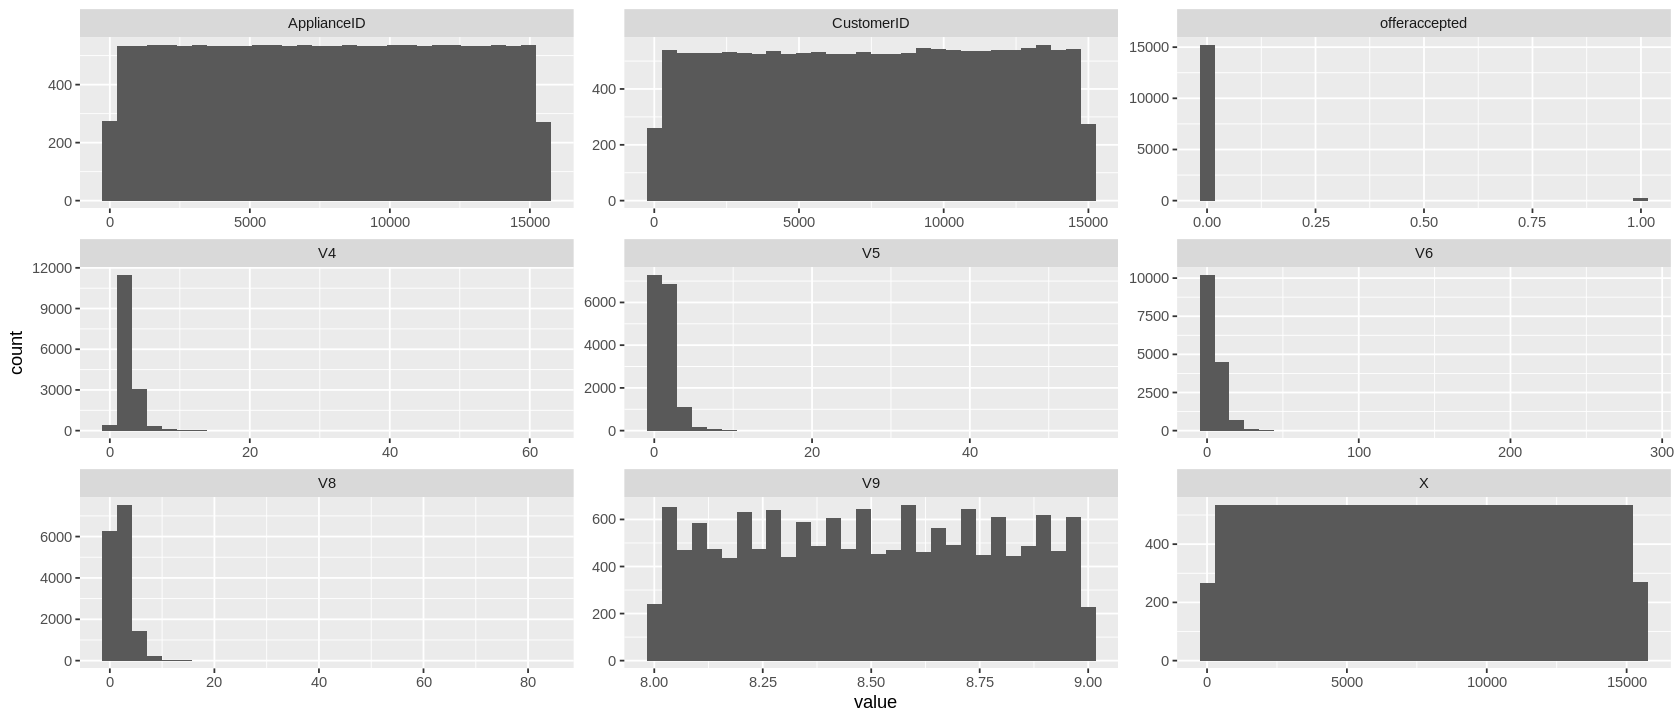

In [ ]:
#visualise numeric data
df %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

In [ ]:
#Frequency table for hypothesis test
freq <- df %>% group_by(Brand) %>% summarise(count_offers = sum(offeraccepted), n = n())
freq

`summarise()` ungrouping output (override with `.groups` argument)



Brand,count_offers,n
<fct>,<dbl>,<int>
A,192,9644
B,34,1900
C,63,3969


In [ ]:
#Comepare all brands and check if there is a statistically significant difference
brand_accept <- as.vector(freq$count_offers)
brand_total <- as.vector(freq$n)
prop.test(brand_accept,brand_total)


	3-sample test for equality of proportions without continuity
	correction

data:  brand_accept out of brand_total
X-squared = 2.5689, df = 2, p-value = 0.2768
alternative hypothesis: two.sided
sample estimates:
    prop 1     prop 2     prop 3 
0.01990875 0.01789474 0.01587302 


In [ ]:
#Check between two groups to see confidence intervals - not significant

# AB_freq <- freq[which(freq$Brand %in% c('A','B')),]
# AB_accept <- as.vector(AB_freq$count_offers)
# AB_total <- as.vector(AB_freq$n)
# prop.test(AB_accept,AB_total)

In [ ]:
#Get data formatted ready for graphing
df_cumsum_actual <- df %>% arrange(OfferAcceptanceDate) %>% 
  mutate(CumulativeSum = cumsum(offeraccepted)) %>% filter(!is.na(OfferAcceptanceDate))

df_cumsum_diff <- df %>% mutate(TimeTillAcceptance = OfferAcceptanceDate - OfferContactDate) %>% arrange(TimeTillAcceptance) %>% 
  mutate(CumulativeSum = cumsum(offeraccepted)) %>% filter(!is.na(OfferAcceptanceDate)) 

In [ ]:
#Calculate tables for daily, weekly and monthly graphs
df$TimeTillAcceptance = df$OfferAcceptanceDate - df$OfferContactDate
df$week = as.numeric(ceiling(df$TimeTillAcceptance/7))
df$month = as.numeric(ceiling(df$TimeTillAcceptance/30.24))

df_cumsum_week <- df %>% filter(!is.na(OfferAcceptanceDate)) %>% group_by(week) %>%  summarise(n = n())
df_cumsum_week <- df_cumsum_week %>% mutate(CumulativeSum = cumsum(n))
df_cumsum_month <- df %>% filter(!is.na(OfferAcceptanceDate)) %>% group_by(month) %>%  summarise(n = n())
df_cumsum_month <- df_cumsum_month %>% mutate(CumulativeSum = cumsum(n))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



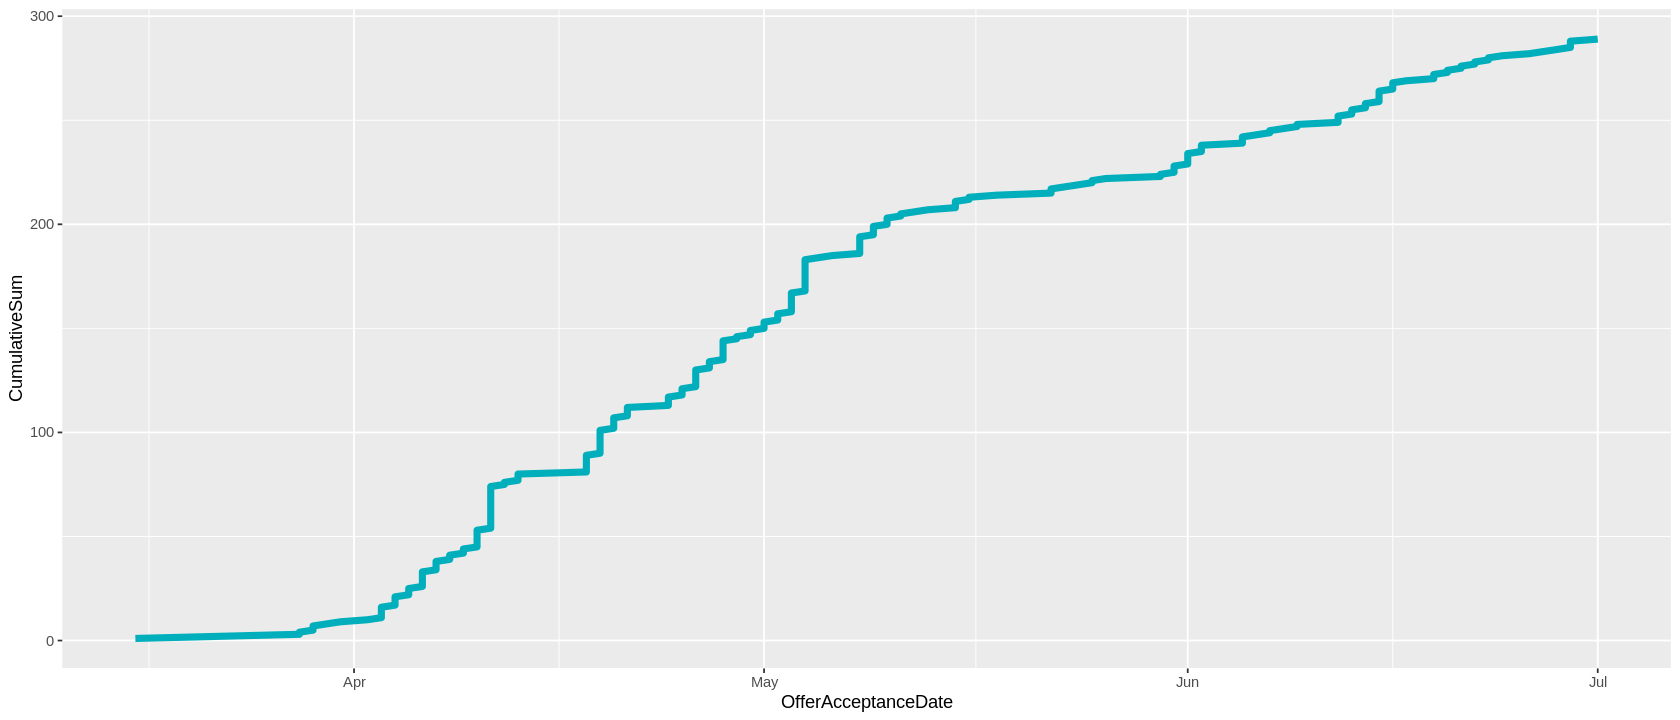

In [ ]:
#Cumulative sum by actual date of acceptance
ggplot(data = df_cumsum_actual, aes(x = OfferAcceptanceDate, y = CumulativeSum))+
  geom_line(color = "#00AFBB", size = 2)

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



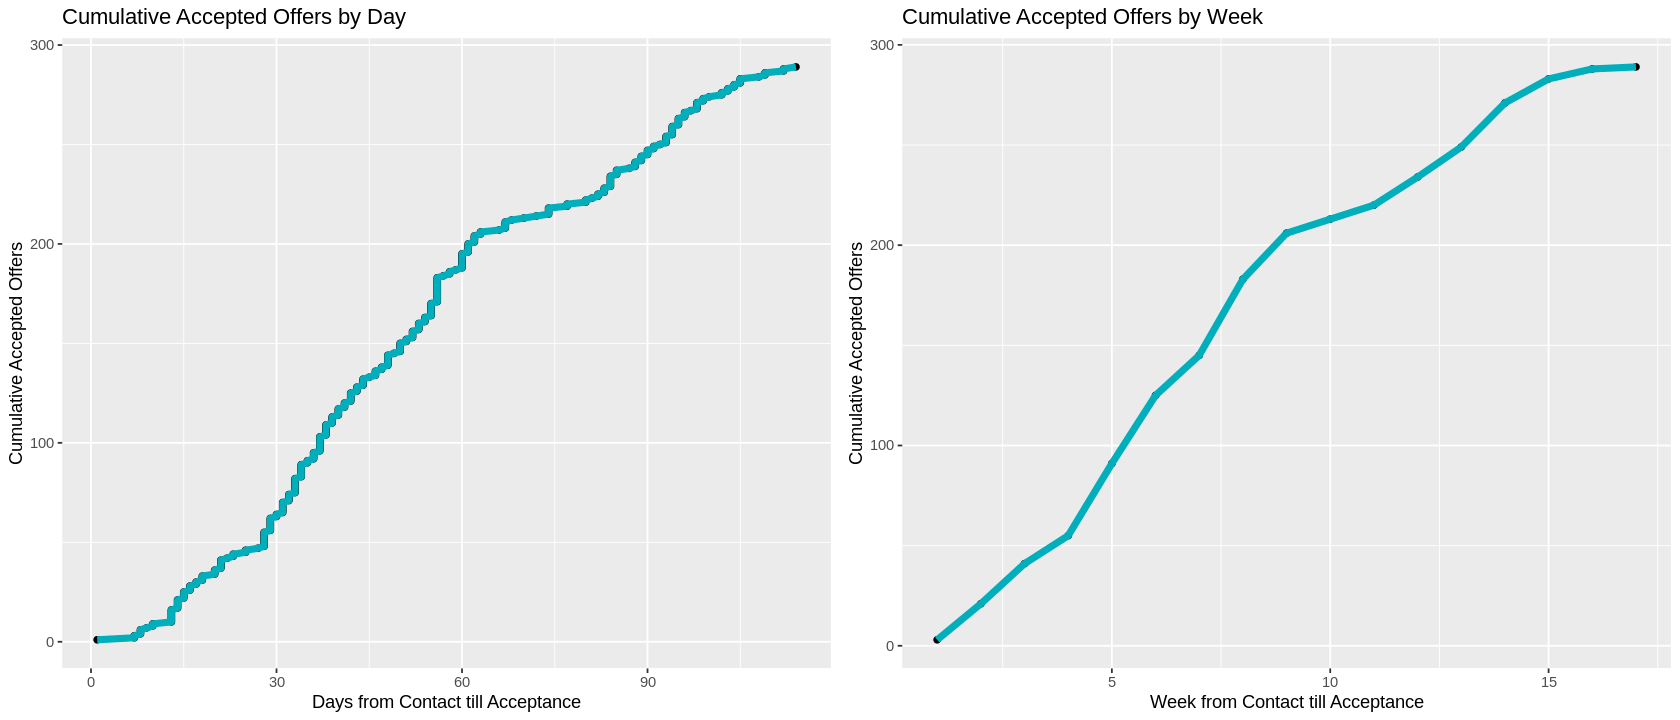

In [ ]:
#Culumative sum of time till acceptance - daily, weekly, monthly
p1 <- ggplot(data = df_cumsum_diff, aes(x = TimeTillAcceptance, y = CumulativeSum))+ geom_line() + geom_point() +
  geom_line(color = "#00AFBB", size = 2) + labs(y="Cumulative Accepted Offers", x = "Days from Contact till Acceptance") + ggtitle("Cumulative Accepted Offers by Day")
p2 <- ggplot(data = df_cumsum_week, aes(x = week, y = CumulativeSum)) +  geom_line() + geom_point()+
  geom_line(color = "#00AFBB", size = 2) + labs(y="Cumulative Accepted Offers", x = "Week from Contact till Acceptance") + ggtitle("Cumulative Accepted Offers by Week") 
options(repr.plot.width=14, repr.plot.height=6)
grid.arrange(p1 , p2, ncol=2, widths = c(5,5))

In [ ]:
#One hot encoding to convert categories to numeric
df_1h <- one_hot(as.data.table(df[,c("V1","V2","V3","V4","V5","V6","V8","V9")]))
df_1h <- cbind(df_1h, offeraccepted=df[,c("offeraccepted")])
df_1h$offeraccepted <- as.factor(df_1h$offeraccepted)

#split into training and testing
smp_size <- floor(0.75 * nrow(df_1h))
set.seed(123)
train_row <- sample(seq_len(nrow(df_1h)), size = smp_size)
model_vars <- names(df_1h)
summary(df_1h)

      V1_A            V1_B             V1_C              V2_A         
 Min.   :0.000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.000   1st Qu.:1.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.000   Median :1.0000   Median :0.00000   Median :0.000000  
 Mean   :0.132   Mean   :0.8054   Mean   :0.06266   Mean   :0.006253  
 3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000000  
      V2_B               V2_C               V2_D             V2_E      
 Min.   :0.000000   Min.   :0.00e+00   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.000000   1st Qu.:0.00e+00   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.000000   Median :0.00e+00   Median :0.0000   Median :0.000  
 Mean   :0.004061   Mean   :6.45e-05   Mean   :0.1193   Mean   :0.383  
 3rd Qu.:0.000000   3rd Qu.:0.00e+00   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :1.000000   Max.   :1.00e+00   Max.   :1.0000   Max.   :1.000  

In [ ]:
#Scale for quicker learning and if we want to look want a comparison of how the variable influence the model
scale1 <- function(x) scale(x)[,1]
df_1h_scale <- df_1h %>% mutate_at(vars(contains("V")), scale1)

full_data <- df_1h_scale[, model_vars, with = FALSE]
train <- df_1h_scale[train_row, model_vars, with = FALSE]
test <- df_1h_scale[-train_row, model_vars, with = FALSE]

dim(full_data)
dim(train)
dim(test)

[1] 15513    32

[1] 11634    32

[1] 3879   32

In [ ]:
mylogit <- glm(offeraccepted ~ . , data = train, family = "binomial")
#Only one significant variables
summary(mylogit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = offeraccepted ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6898  -0.1853  -0.1720  -0.1594   3.1310  

Coefficients: (4 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -4.370e+00  5.399e+00  -0.809  0.41835   
V1_A         3.225e-01  1.004e-01   3.211  0.00132 **
V1_B        -1.393e-01  1.139e-01  -1.223  0.22141   
V1_C                NA         NA      NA       NA   
V2_A         6.430e-02  3.142e+02   0.000  0.99984   
V2_B         9.131e-01  2.516e+02   0.004  0.99710   
V2_C                NA         NA      NA       NA   
V2_D         4.614e+00  1.282e+03   0.004  0.99713   
V2_E         6.845e+00  1.923e+03   0.004  0.99716   
V2_F         7.029e+00  1.967e+03   0.004  0.99715   
V2_G         2.840e+00  7.862e+02   0.004  0.99712   
V2_H         1.206e-02  6.731e+01   0.000  0.99986   
V2_I                NA         NA      NA       NA   

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6592

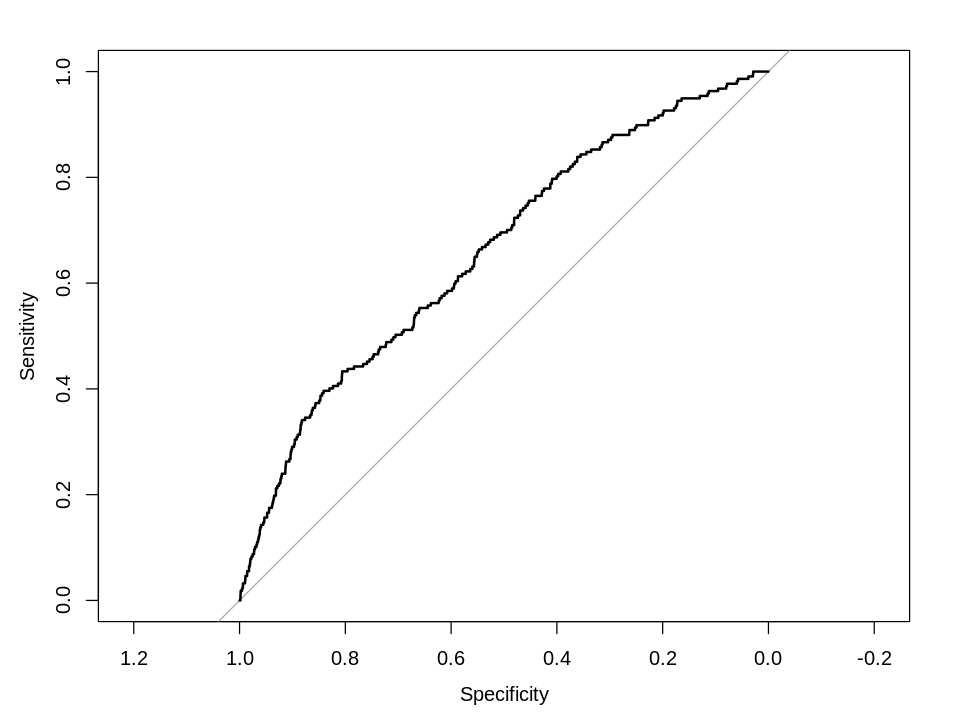

In [ ]:
#Check AUC performance on the train sent
prob=predict(mylogit,type=c("response"))
train$prob=prob
options(repr.plot.width=8, repr.plot.height=6)
library(pROC)
g <- roc(offeraccepted ~ prob, data = train)
auc(g)
plot(g)    

In [ ]:
dim(test)
dim(train)
dim(df_1h_scale)

[1] 3879   32

[1] 11634    33

[1] 15513    32

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6662

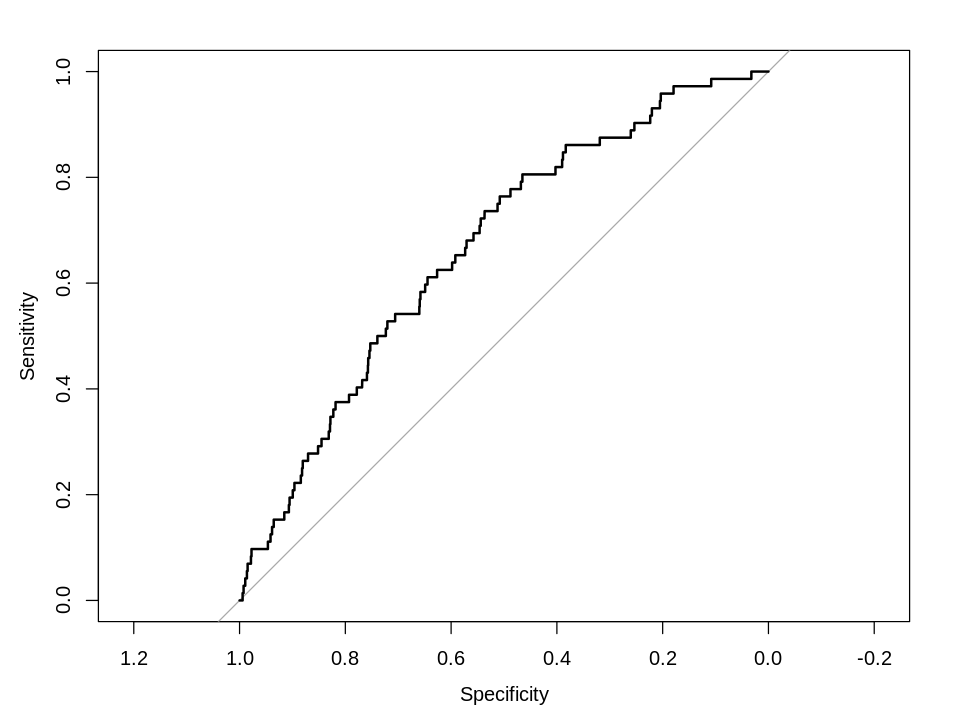

In [ ]:
#Check AUC performance on the test sent
prob=predict(mylogit,newdata=test)
test$prob=prob
library(pROC)
g <- roc(offeraccepted ~ prob, data = test)
auc(g)
plot(g) 

In [ ]:
# define training control
train_control <- trainControl(method = "cv", number = 10)

# train the model on training set
cv_model <- train(offeraccepted ~ .,
               data = df_1h_scale,
               trControl = train_control,
               method = "glm",
               family=binomial())

# print cv scores
summary(cv_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-defic


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0109  -0.1931  -0.1736  -0.1565   3.1913  

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -4.368e+00  4.549e+00  -0.960  0.33686   
V1_A         2.673e-01  8.504e-02   3.144  0.00167 **
V1_B        -1.673e-01  9.568e-02  -1.748  0.08040 . 
V1_C                NA         NA      NA       NA   
V2_A         1.580e-02  3.135e+02   0.000  0.99996   
V2_B         9.036e-01  2.516e+02   0.004  0.99713   
V2_C         1.228e-03  4.492e+01   0.000  0.99998   
V2_D         4.457e+00  1.282e+03   0.003  0.99723   
V2_E         6.602e+00  1.923e+03   0.003  0.99726   
V2_F         6.807e+00  1.967e+03   0.003  0.99724   
V2_G         2.758e+00  7.862e+02   0.004  0.99720   
V2_H         5.122e-03  6.350e+01   0.000  0.99994   
V2_I                NA         NA      NA       NA   
V3_AW       -1.337e-01  1.458e-01  -0.917  0.35907   
V3_CH   

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Setting direction: controls > cases



Area under the curve: 0.6662

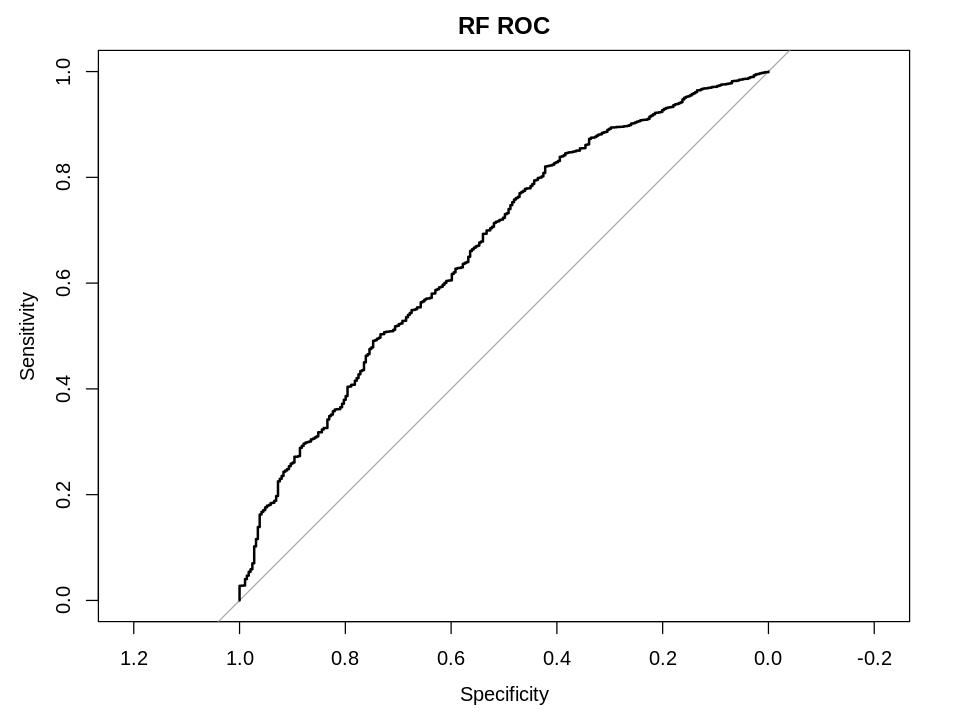

In [ ]:
#Check AUC performance on the full data
test_probs <- predict(cv_model,df_1h_scale,type="prob")

cv_lr.ROC <- roc(predictor=test_probs[,2],
                response=df_1h_scale$offeraccepted,
                levels=rev(levels(df_1h_scale$offeraccepted)))
cv_lr.ROC$auc
plot(cv_lr.ROC,main="RF ROC")

In [ ]:
varImp(cv_model)

glm variable importance

  only 20 most important variables shown (out of 28)

       Overall
V1_A  100.0000
V5     61.4897
V3_FZ  56.2726
V3_HB  55.9898
V8     55.7526
V1_B   55.6165
V3_TD  49.2396
V3_DW  43.0970
V3_FF  35.0577
V3_OV  32.9771
V4     31.0669
V3_AW  29.1740
V3_FR  21.5336
V6     20.4528
V9     20.4121
V3_CK  16.1615
V3_CL   1.2617
V3_CH   1.0692
V3_MW   0.5089
V3_MI   0.1176

In [ ]:
#Format for RF training
train_temp <- df_1h_scale  %>% 
  mutate(offeraccepted = factor(offeraccepted, 
          labels = make.names(levels(offeraccepted))))

In [ ]:
#Set controls for RF model
ctrl <- trainControl(method = "repeatedcv", 
                     number = 5, 
                     repeats = 3, 
                     verboseIter = FALSE,
                     summaryFunction = twoClassSummary,
                     classProbs = TRUE,
                     sampling = "up")
#Fit the RF model
model_rf_over <- train(offeraccepted ~ .,
                         data = train_temp,
                         method = "rf",
                         #preProcess = c("scale", "center"),
                         trControl = ctrl,
                         metric="ROC")
print(model_rf_over)

Random Forest 

15513 samples
   31 predictor
    2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 12411, 12410, 12411, 12410, 12410, 12410, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec       
   2    0.6258037  0.7776526  0.405847953
  16    0.5541334  0.9925119  0.001169591
  31    0.5488863  0.9902347  0.006977213

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


In [ ]:
#Check variable importance
varImp(model_rf_over, scale = FALSE)

rf variable importance

  only 20 most important variables shown (out of 31)

      Overall
V1_A   301.45
V9     277.47
V1_B   266.79
V6     198.94
V8     161.91
V4     151.89
V5     150.31
V3_AW   41.93
V2_E    38.25
V3_CK   37.71
V2_F    35.95
V3_OV   34.12
V3_TD   31.60
V2_D    30.50
V3_FF   30.21
V3_FZ   29.16
V1_C    28.46
V3_HB   27.62
V3_FR   27.31
V3_WD   26.77

,mtry
,<dbl>
1,2


,mtry,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.6258037,0.7776526,0.405847953,0.03134540,0.040787804,0.094367111
2,16,0.5541334,0.9925119,0.001169591,0.03227172,0.001580685,0.004529805
3,31,0.5488863,0.9902347,0.006977213,0.03210622,0.002379512,0.014496743


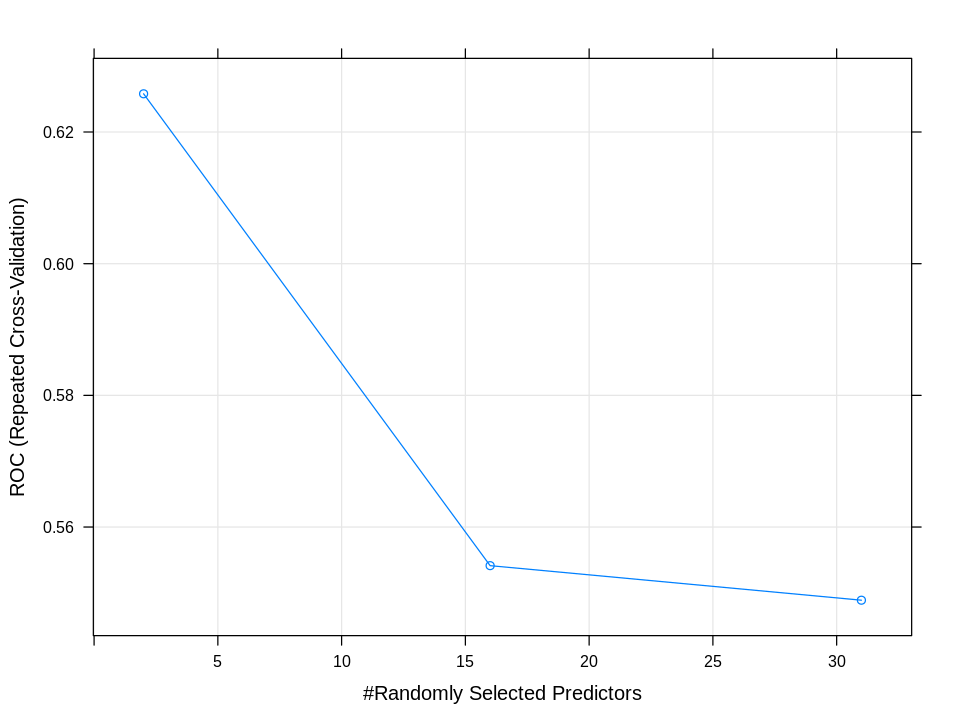

In [ ]:
model_rf_over$bestTune
plot(model_rf_over)  		# Plot the performance of the training models
res <- model_rf_over$results
res